# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

---

## **Context**

---

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

---

## **Objective**

---

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

---

## **Dataset**

---

Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.


## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import h5py  # for loading our data in h5 format
import random

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras

# Sequential API for sequential model
from tensorflow.keras.models import Sequential, Model

# Importing different layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical  # To perform one-hot encoding

# Optimizers for optimizing the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2024-03-03 10:35:54.808210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 10:35:54.808229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 10:35:54.808762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-03 10:35:54.811938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-03 10:35:55.347062: W tensorflow/compiler/tf2

**Let us check the version of tensorflow.**


In [2]:
print(tf.__version__)

2.15.0


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Num GPUs Available:  1


2024-03-03 10:36:57.367252: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 10:36:57.383834: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 10:36:57.383991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.


In [4]:
# Path to the dataset
# file_path = "/content/drive/MyDrive/Studies/MIT-AI-ML/10. Elective Project/Deep Learning/SVHN_single_grey1.h5"

file_path = "/home/iamtxena/sandbox/mit-ai/elective/SVHN_single_grey1.h5"
# We first open the file and explore the keys
with h5py.File(file_path, "r") as h5_file:
    # Print the keys in the file
    print("Keys in the file:", list(h5_file.keys()))
    # We also explore the shape of datasets
    for key in h5_file.keys():
        print(f"Shape of {key}: {h5_file[key].shape}")

Keys in the file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
Shape of X_test: (18000, 32, 32)
Shape of X_train: (42000, 32, 32)
Shape of X_val: (60000, 32, 32)
Shape of y_test: (18000,)
Shape of y_train: (42000,)
Shape of y_val: (60000,)


In [5]:
# Now, we now the correct keys and we can load correctly the dataset and get the train, validation and test data
with h5py.File(file_path, "r") as h5_file:
    X_train = h5_file["X_train"][:]
    Y_train = h5_file["y_train"][:]
    X_val = h5_file["X_val"][:]
    Y_val = h5_file["y_val"][:]
    X_test = h5_file["X_test"][:]
    Y_test = h5_file["y_test"][:]

Check the number of images in the training and the testing dataset.


In [6]:
num_train_images = X_train.shape[0]  # Number of training images
num_test_images = X_test.shape[0]  # Number of testing images

print(f"Number of images in the training dataset: {num_train_images:,}")
print(f"Number of images in the testing dataset: {num_test_images:,}")

Number of images in the training dataset: 42,000
Number of images in the testing dataset: 18,000


**Observation:**

- The dataset loaded from an HDF5 file contains multiple keys, including 'X_train', 'X_val', 'y_train', 'y_test', and 'y_val', which represent training, validation, and test datasets along with their respective labels.

- The training data (X_train) consists of 42,000 grayscale images of shape 32x32, indicating that each image is 32 pixels in height and 32 pixels in width.
- The test data (X_test) contains 18,000 images.


## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.


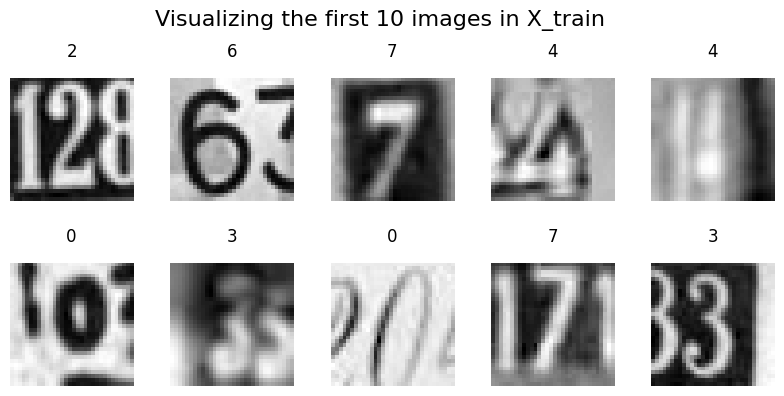

In [7]:
# Create a figure and set of subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 4))  # 2 rows, 5 columns
fig.suptitle("Visualizing the first 10 images in X_train", fontsize=16, y=1.05)

# Visualize the first 10 images and their labels in two rows
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")  # Display each image in grayscale
    # Set the title with padding to create space
    ax.set_title(Y_train[i], pad=15)
    ax.axis("off")  # Hide the axes

# Adjust layout to make room for the figure title and subplot titles
plt.subplots_adjust(hspace=0.5)

plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.


In [8]:
# Print the shape of the first image in X_train
print("Shape of the first image:", X_train[0].shape)

# Print the array of pixels for the first image in X_train
print("\nArray of pixels for the first image:\n", X_train[0])

Shape of the first image: (32, 32)

Array of pixels for the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**


In [9]:
# Normalizing the image pixels
X_train_normalized = X_train / 255
X_test_normalized = X_test / 255

In [10]:
# checking that data has been normalized
# Print the array of pixels for the first image in X_train_normalized
print("\nArray of pixels for the first image in X_train_normalized:\n", X_train_normalized[0])
# Print the array of pixels for the first image in X_test_normalized
print("\nArray of pixels for the first image in X_test_normalized:\n", X_test_normalized[0])


Array of pixels for the first image in X_train_normalized:
 [[0.12968785 0.11866706 0.10530196 ... 0.2801847  0.2283153  0.16860352]
 [0.09893451 0.10020902 0.1175549  ... 0.4432192  0.40534863 0.33056822]
 [0.10304902 0.08868118 0.15873058 ... 0.44432473 0.47754902 0.45263842]
 ...
 [0.11196157 0.14200786 0.17678471 ... 0.09465059 0.09840274 0.10219726]
 [0.15072627 0.10381687 0.09126157 ... 0.11023294 0.11556196 0.11790627]
 [0.19724864 0.10226392 0.0942702  ... 0.19477727 0.19942354 0.20799099]]

Array of pixels for the first image in X_test_normalized:
 [[0.15905097 0.18349686 0.19206432 ... 0.43966785 0.44309962 0.43986115]
 [0.15465844 0.17369059 0.18500705 ... 0.43534195 0.43508825 0.4311247 ]
 [0.1507796  0.1711349  0.19101882 ... 0.4309494  0.43114275 0.42786196]
 ...
 [0.13720353 0.13910078 0.15555921 ... 0.42827842 0.4310094  0.44209644]
 [0.13984391 0.13939686 0.15811491 ... 0.43529335 0.43940786 0.4484043 ]
 [0.1419102  0.13890745 0.15960705 ... 0.43143883 0.4360851  0.44

Print the shapes of Training and Test data


In [11]:
# Print the shapes of the datasets
print("Shape of normalized training data (features):", X_train_normalized.shape)
print("Shape of normalized testing data (features):", X_test_normalized.shape)

Shape of normalized training data (features): (42000, 32, 32)
Shape of normalized testing data (features): (18000, 32, 32)


### **One-hot encode output**


In [12]:
# Creating one-hot encoded representation of target labels
Y_train_encoded = tf.keras.utils.to_categorical(Y_train)
Y_test_encoded = tf.keras.utils.to_categorical(Y_test)

**Observation:**

- The shape of the first image in the training dataset is confirmed to be 32x32, and a sample of the pixel array is printed, showing the raw pixel values before normalization.
- The normalization of the training and test datasets is performed correctly by dividing by 255, effectively scaling the pixel values to the range [0, 1]
- And finally, we implement the one-hot encoding of the target variable, so it can be treated as categorical.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators


In [13]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**

- Write a function that returns a sequential model with the following architecture:
- First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
- Second hidden layer with **32 nodes and the relu activation**
- Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
- Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.


### **Build and train an ANN model as per the above mentioned architecture.**


In [14]:
nn_model_1 = Sequential(
    [
        # Adding Flatten layer to convert the 32x32 images into a 1D array of 1024
        Flatten(input_shape=(32, 32)),
        # First hidden layer with 64 nodes and relu activation
        Dense(62, activation="relu"),
        # Second hidden layer with 32 nodes and relu activation
        Dense(32, activation="relu"),
        # Output layer with softmax activation and 10 nodes (for 10 classes)
        Dense(10, activation="softmax"),
    ]
)

# Compile model
nn_model_1.compile(optimizer=Adam(learning_rate=0.001),
                   loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 62)                63550     
                                                                 
 dense_1 (Dense)             (None, 32)                2016      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 65896 (257.41 KB)
Trainable params: 65896 (257.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-03 10:41:59.955860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 10:41:59.956018: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 10:41:59.956123: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
history = nn_model_1.fit(
    X_train_normalized, Y_train_encoded, epochs=20, validation_split=0.2, shuffle=True, batch_size=128, verbose=1
)

Epoch 1/20


2024-03-03 10:42:34.323121: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f83d506d1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-03 10:42:34.323139: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-03-03 10:42:34.326565: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-03 10:42:34.336917: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709462554.407007   70400 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


263/263 [==============================] - 1s 2ms/step - loss: 2.2899 - accuracy: 0.1192 - val_loss: 2.2310 - val_accuracy: 0.1650
Epoch 2/20
263/263 [==============================] - 0s 2ms/step - loss: 2.1432 - accuracy: 0.1750 - val_loss: 2.0807 - val_accuracy: 0.1977
Epoch 3/20
263/263 [==============================] - 0s 2ms/step - loss: 2.0474 - accuracy: 0.2013 - val_loss: 2.0111 - val_accuracy: 0.2101
Epoch 4/20
263/263 [==============================] - 0s 1ms/step - loss: 1.9927 - accuracy: 0.2251 - val_loss: 1.9760 - val_accuracy: 0.2236
Epoch 5/20
263/263 [==============================] - 0s 2ms/step - loss: 1.9565 - accuracy: 0.2345 - val_loss: 1.9349 - val_accuracy: 0.2370
Epoch 6/20
263/263 [==============================] - 0s 2ms/step - loss: 1.9309 - accuracy: 0.2472 - val_loss: 1.9289 - val_accuracy: 0.2374
Epoch 7/20
263/263 [==============================] - 0s 2ms/step - loss: 1.9110 - accuracy: 0.2591 - val_loss: 1.9385 - val_accuracy: 0.2600
Epoch 8/20
263/26

### **Plot the Training and Validation Accuracies and write down your Observations.**


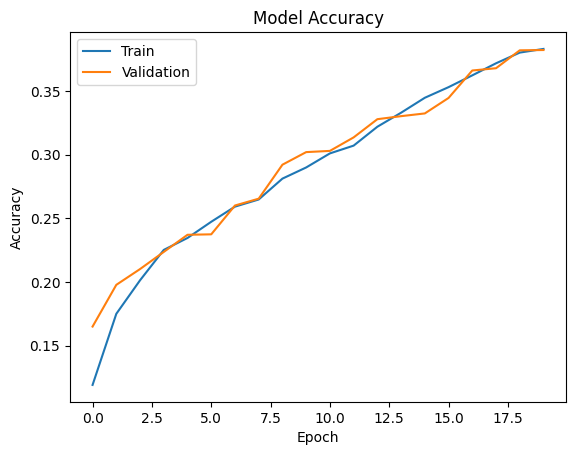

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

**Observations:**

- The training and validation accuracies progress similarly over the epochs with a gradual increase, suggesting that the model is learning as expected and not overfitting, which is a positive indication of its generalization.

- Both training and validation accuracies are quite low, **only 38%**, indicating that the model's predictive performance is not yet optimal and may benefit from further training, a more complex model architecture, or additional techniques to improve learning.


Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.


In [17]:
# Clearing the backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
- First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
- Second hidden layer with **128 nodes and the relu activation**
- Add the **Dropout layer with the rate equal to 0.2**
- Third hidden layer with **64 nodes and the relu activation**
- Fourth hidden layer with **64 nodes and the relu activation**
- Fifth hidden layer with **32 nodes and the relu activation**
- Add the **BatchNormalization layer**
- Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
  -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.


### **Build and train the new ANN model as per the above mentioned architecture**


In [18]:
nn_model_2 = Sequential(
    [
        # Adding Flatten layer to convert the 32x32 images into a 1D array of 1024
        Flatten(input_shape=(32, 32)),
        # First hidden layer with 256 nodes and relu activation
        Dense(256, activation="relu"),
        # Second hidden layer with 128 nodes and relu activation
        Dense(128, activation="relu"),
        # Adding dropout to randomly switch off 20% neurons
        Dropout(0.2),
        # Third hidden layer with 64 nodes and relu activation
        Dense(64, activation="relu"),
        # Fourth hidden layer with 64 nodes and relu activation
        Dense(64, activation="relu"),
        # Fifth hidden layer with 32 nodes and relu activation
        Dense(64, activation="relu"),
        # Adding Batch Normalization layer
        BatchNormalization(),
        # Output layer with softmax activation and 10 nodes (for 10 classes)
        Dense(10, activation="softmax"),
    ]
)

# Compile model
nn_model_2.compile(optimizer=Adam(learning_rate=0.0005),
                   loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
nn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    


                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 10)                650       
          

In [19]:
history_2 = nn_model_2.fit(
    X_train_normalized, Y_train_encoded, epochs=30, validation_split=0.2, shuffle=True, batch_size=128, verbose=1
)

Epoch 1/30
263/263 [==============================] - 3s 3ms/step - loss: 2.3612 - accuracy: 0.1019 - val_loss: 2.3071 - val_accuracy: 0.0999
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 2.2702 - accuracy: 0.1364 - val_loss: 2.1650 - val_accuracy: 0.1961
Epoch 3/30
263/263 [==============================] - 1s 2ms/step - loss: 1.8311 - accuracy: 0.3315 - val_loss: 1.7210 - val_accuracy: 0.3964
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 1.5059 - accuracy: 0.4843 - val_loss: 1.2794 - val_accuracy: 0.5892
Epoch 5/30
263/263 [==============================] - 1s 3ms/step - loss: 1.2783 - accuracy: 0.5796 - val_loss: 1.1768 - val_accuracy: 0.6195
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 1.1762 - accuracy: 0.6207 - val_loss: 1.0788 - val_accuracy: 0.6549
Epoch 7/30
263/263 [==============================] - 1s 2ms/step - loss: 1.1179 - accuracy: 0.6424 - val_loss: 1.0269 - val_accuracy: 0.6698
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**


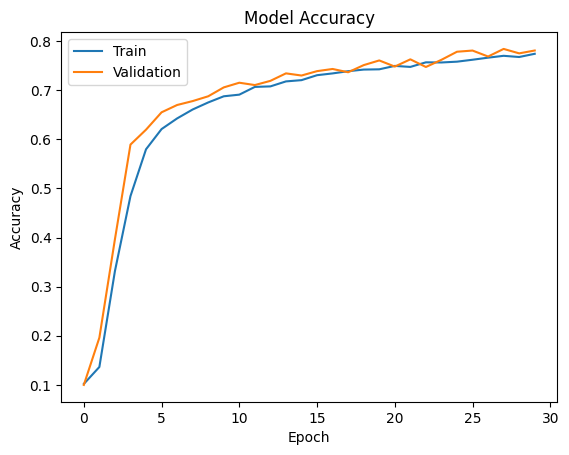

In [20]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

**Observations:**

- The updated model shows a significant improvement in both training and validation accuracy compared to the previous model, indicating a better fit to the data, with a validation accuracy of 75%.

- The training and validation accuracies are still closely aligned throughout the training epochs, suggesting that the model is generalizing well without overfitting.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.


In [21]:
# Making predictions on the test data
y_pred_test = nn_model_2.predict(X_test_normalized)

563/563 [==============================] - 0s 713us/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.


In [22]:
# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**


In [23]:
unique_classes = np.unique(y_pred_test_classes)
tick_labels = [str(cls) for cls in unique_classes]

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1814
           1       0.78      0.82      0.80      1828
           2       0.81      0.78      0.80      1803
           3       0.78      0.70      0.74      1719
           4       0.78      0.85      0.82      1812
           5       0.82      0.69      0.75      1768
           6       0.77      0.78      0.77      1832
           7       0.79      0.82      0.80      1808
           8       0.69      0.76      0.73      1812
           9       0.70      0.80      0.75      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



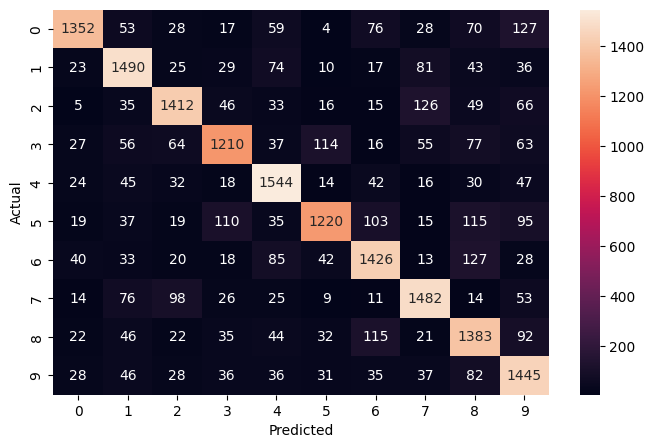

In [24]:
# Printing the classification report
print(classification_report(Y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_test, y_pred_test_classes)

plt.figure(figsize=(8, 5))

sns.heatmap(cm, annot=True, fmt=".0f",
            xticklabels=tick_labels, yticklabels=tick_labels)

plt.ylabel("Actual")

plt.xlabel("Predicted")

# Display the plot
plt.show()

**Final Observations:**

- The model has achieved a balanced precision and recall across most classes, as indicated by the relatively consistent f1-scores, ranging from 0.69 to 0.82, with the digit '1' having the highest f1-score.

- The confusion matrix shows that some digits, such as '1', '2', and '7', are the ones best classified, with good model performance for these digits. However, there are notable confusions between some, such as between '4' and '9', '3' and '5'.

- The overall accuracy of the model is 0.76, meaning that 76% of the digits were correctly classified, which is a reasonable performance but suggests there is room for improvement.


## **Using Convolutional Neural Networks**


### **Load the dataset again and split the data into the train and the test dataset.**


In [26]:
# Path to the dataset
# file_path = "/content/drive/MyDrive/Studies/MIT-AI-ML/10. Elective Project/Deep Learning/SVHN_single_grey1.h5"

file_path = "/home/iamtxena/sandbox/mit-ai/elective/SVHN_single_grey1.h5"

# Now, we now the correct keys and we can load correctly the dataset and get the train and test data
with h5py.File(file_path, "r") as h5_file:
    X_train = h5_file["X_train"][:]
    Y_train = h5_file["y_train"][:]
    X_test = h5_file["X_test"][:]
    Y_test = h5_file["y_test"][:]

Check the number of images in the training and the testing dataset.


In [27]:
num_train_images = X_train.shape[0]  # Number of training images
num_test_images = X_test.shape[0]  # Number of testing images

print(f"Number of images in the training dataset: {num_train_images:,}")
print(f"Number of images in the testing dataset: {num_test_images:,}")

Number of images in the training dataset: 42,000
Number of images in the testing dataset: 18,000


**Observation:**

- The dataset loaded from an HDF5 file contains the data already split into train and test. 'X_train', 'y_train', 'X_test', and 'y_test' represent training and test datasets along with their respective labels.

- The training data (X_train) consists of 42,000 grayscale images.
- The test data (X_test) contains 18,000 images.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.


In [28]:
# Print the shape of the first image in X_train
print("Shape of the first image:", X_train[0].shape)

# Print the array of pixels for the first image in X_train
print("\nArray of pixels for the first image:\n", X_train[0])

Shape of the first image: (32, 32)

Array of pixels for the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs


In [29]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

Normalize inputs from 0-255 to 0-1


In [30]:
# Normalizing the image pixels
X_train_normalized = X_train.astype("float32") / 255.0
X_test_normalized = X_test.astype("float32") / 255.0

Print New shape of Training and Test


In [31]:
# Print the shape of the new X_train
print("Shape of the new X_train:", X_train.shape)
# Print the shape of the new X_test
print("Shape of the new X_test:", X_test.shape)

Shape of the new X_train: (42000, 32, 32, 1)
Shape of the new X_test: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**


In [32]:
y_train_encoded = tf.keras.utils.to_categorical(Y_train)
y_test_encoded = tf.keras.utils.to_categorical(Y_test)

**Observation:**

- The shape of the first image in the training dataset is also confirmed to be 32x32, and a sample of the pixel array is printed, showing the raw pixel values before normalization.
- It is needed to reshape to 4D, adding the last dimension to '1' as it is a grayscale.
- The normalization of the training and test datasets is performed correctly by dividing by 255.
- And finally, we implement the one-hot encoding of the target variable, so it can be treated as categorical.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators


In [33]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**

- **Write a function** that returns a sequential model with the following architecture:
- First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
- Add a **LeakyRelu layer** with the **slope equal to 0.1**
- Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
- Another **LeakyRelu** with the **slope equal to 0.1**
- A **max-pooling layer** with a **pool size of 2x2**
- **Flatten** the output from the previous layer
- Add a **dense layer with 32 nodes**
- Add a **LeakyRelu layer with the slope equal to 0.1**
- Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
- Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.


### **Build and train a CNN model as per the above mentioned architecture.**


In [34]:
# Intializing a sequential model
cnn_model_1 = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
cnn_model_1.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

# Adding second conv layer with 32 filters and the kernel size of 3x3 with 'same' padding
cnn_model_1.add(Conv2D(32, (3, 3), padding="same"))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

cnn_model_1.add(MaxPooling2D((2, 2)))  # no padding added

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_1.add(Dense(32))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_1.add(LeakyReLU(0.1))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model_1.add(Dense(10, activation="softmax"))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

# Compile cnn_model_1
cnn_model_1.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the cnn_model_1
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [35]:
history_1 = cnn_model_1.fit(
    X_train_normalized, y_train_encoded, epochs=20, validation_split=0.2, shuffle=True, batch_size=32, verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 3s 2ms/step - loss: 1.1000 - accuracy: 0.6459 - val_loss: 0.6426 - val_accuracy: 0.8142
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.8458 - val_loss: 0.5376 - val_accuracy: 0.8426
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4510 - accuracy: 0.8663 - val_loss: 0.5163 - val_accuracy: 0.8523
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3902 - accuracy: 0.8859 - val_loss: 0.4466 - val_accuracy: 0.8756
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3421 - accuracy: 0.8975 - val_loss: 0.4622 - val_accuracy: 0.8683
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.9092 - val_loss: 0.4652 - val_accuracy: 0.8742
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.9174 - val_loss: 0.4574 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**


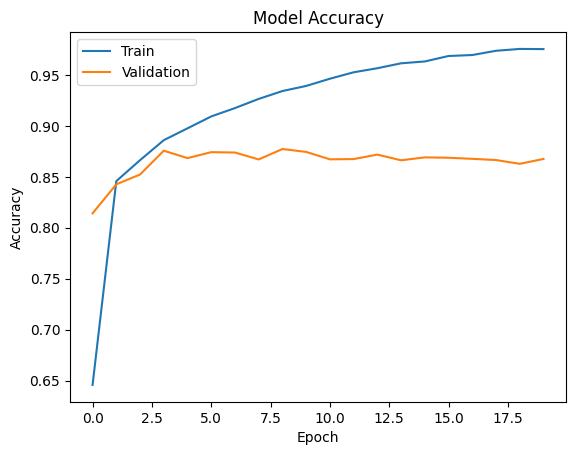

In [36]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

**Observations:**

- The training accuracy is quite high and continues to improve over epochs, reaching the 97.9% on the last 20th epoch.
- However, there is a notable gap between the training and validation accuracy, with the validation accuracy being lower, reaching 86.6%.
- This gap indicates that the model may be overfitting to the training data, as it performs significantly better on the training data than on unseen validation data.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.


In [37]:
# Clearing the backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
- First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
- Add a **LeakyRelu layer** with the **slope equal to 0.1**
- Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
- Add **LeakyRelu** with the **slope equal to 0.1**
- Add a **max-pooling layer** with a **pool size of 2x2**
- Add a **BatchNormalization layer**
- Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
- Add a **LeakyRelu layer with the slope equal to 0.1**
- Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
- Add a **LeakyRelu layer with the slope equal to 0.1**
- Add a **max-pooling layer** with a **pool size of 2x2**
- Add a **BatchNormalization layer**
- **Flatten** the output from the previous layer
- Add a **dense layer with 32 nodes**
- Add a **LeakyRelu layer with the slope equal to 0.1**
- Add a **dropout layer with the rate equal to 0.5**
- Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
- Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.


### **Build and train the second CNN model as per the above mentioned architecture.**


In [38]:
# Intializing a sequential model
cnn_model_2 = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
cnn_model_2.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding second conv layer with 32 filters and the kernel size of 3x3 with 'same' padding
cnn_model_2.add(Conv2D(32, (3, 3), padding="same"))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

cnn_model_2.add(MaxPooling2D((2, 2)))  # no padding added

# Adding Batch Normalization layer
cnn_model_2.add(BatchNormalization())

# Adding third conv layer with 32 filters and the kernel size of 3x3 with 'same' padding
cnn_model_2.add(Conv2D(32, (3, 3), padding="same"))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

cnn_model_2.add(MaxPooling2D((2, 2)))  # no padding added

# Adding Batch Normalization layer
cnn_model_2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
cnn_model_2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
cnn_model_2.add(Dense(32))

# Adding LeakyRelu activation function with a slope of 0.1
cnn_model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons
cnn_model_2.add(Dropout(0.5))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
cnn_model_2.add(Dense(10, activation="softmax"))

# Using Adam Optimizer
opt = Adam(learning_rate=0.001)

# Compile cnn_model_2
cnn_model_2.compile(
    optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the cnn_model_2
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [39]:
history_2 = cnn_model_2.fit(
    X_train_normalized, y_train_encoded, epochs=30, validation_split=0.2, shuffle=True, batch_size=128, verbose=1
)

Epoch 1/30
263/263 [==============================] - 3s 7ms/step - loss: 1.6504 - accuracy: 0.4205 - val_loss: 3.1587 - val_accuracy: 0.1099
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 0.8229 - accuracy: 0.7423 - val_loss: 1.3806 - val_accuracy: 0.5756
Epoch 3/30
263/263 [==============================] - 1s 4ms/step - loss: 0.6709 - accuracy: 0.7916 - val_loss: 0.5507 - val_accuracy: 0.8338
Epoch 4/30
263/263 [==============================] - 1s 4ms/step - loss: 0.6029 - accuracy: 0.8128 - val_loss: 0.4536 - val_accuracy: 0.8668
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 0.5579 - accuracy: 0.8289 - val_loss: 0.4528 - val_accuracy: 0.8652
Epoch 6/30
263/263 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.8374 - val_loss: 0.4268 - val_accuracy: 0.8746
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.8466 - val_loss: 0.4266 - val_accuracy: 0.8812
Epoch 

### **Plot the Training and Validation accuracies and write your observations.**


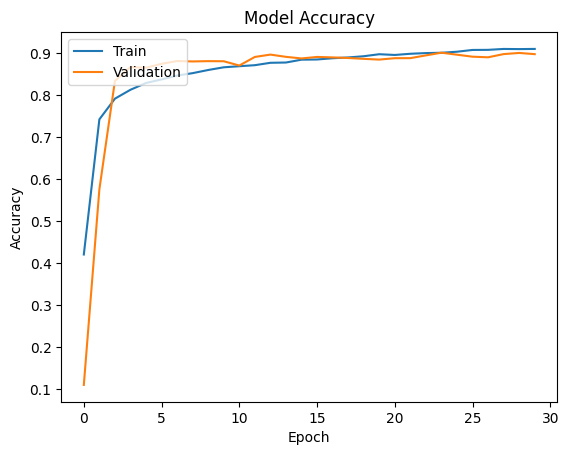

In [40]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

**Observations:**

- The training accuracy is very high, reaching above 90%, which indicates the model has learned to classify the digits from the training dataset effectively.

- In this second model, the validation accuracy closely tracks the training accuracy, staying above 88% and showing a tight convergence with the training curve.
- Therefore, this implies that the model is generalizing well to unseen data and suggests a good balance between bias and variance, with no significant overfitting observed within the range of epochs shown.


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.


### **Make predictions on the test data using the second model.**


In [41]:
# Making predictions on the test data
y_pred_test = cnn_model_2.predict(X_test_normalized)

563/563 [==============================] - 1s 1ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.


In [42]:
# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

unique_classes = np.unique(y_pred_test_classes)
tick_labels = [str(cls) for cls in unique_classes]

### **Write your final observations on the performance of the model on the test data.**


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1814
           1       0.90      0.89      0.90      1828
           2       0.91      0.92      0.91      1803
           3       0.91      0.84      0.87      1719
           4       0.91      0.93      0.92      1812
           5       0.89      0.89      0.89      1768
           6       0.85      0.89      0.87      1832
           7       0.90      0.92      0.91      1808
           8       0.88      0.87      0.88      1812
           9       0.90      0.89      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



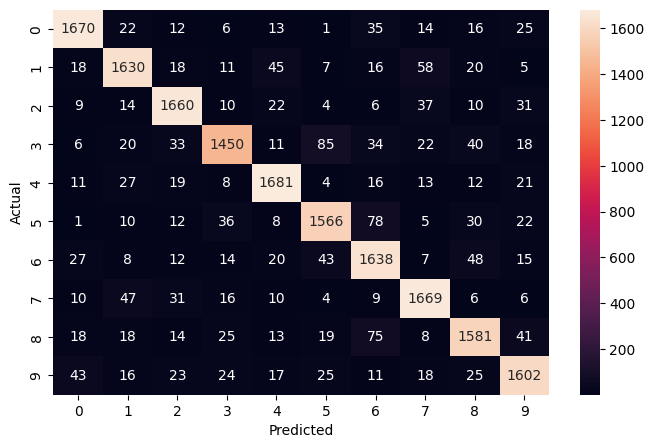

In [43]:
# Printing the classification report
print(classification_report(Y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(Y_test, y_pred_test_classes)

plt.figure(figsize=(8, 5))

sns.heatmap(cm, annot=True, fmt=".0f",
            xticklabels=tick_labels, yticklabels=tick_labels)

plt.ylabel("Actual")

plt.xlabel("Predicted")

# Display the plot
plt.show()

**Final Observations:**

- The classification report shows high precision, recall, and f1-scores for all digit classes, indicating that the model is performing well across the board.

- The confusion matrix reveals that most predictions are concentrated along the diagonal, meaning that the majority of predictions are correct.

- Misclassifications are relatively few and distributed across various classes, which indicates no single class is significantly more challenging for the model than others.

- The overall accuracy of the model on the test data is 89%, which is a strong performance and suggests the model is robust in recognizing digits from the dataset.

- This Convolutional NN model outperforms the previous ANN one, with an 89% accuracy from the CNN compared to the 77% one from the ANN. In case of moving a model into production, we would pick the CNN as a starting point.
